## Without Single Ramp Expansion

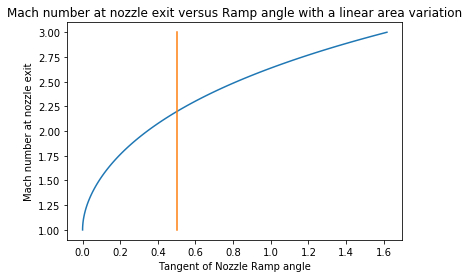

In [5]:
'''Author: Soham S. Phanse
Roll number: 19D170030
Department of Aerospace Engineering
Indian Institute of Technology Bombay
AE223 - Scramjet Engine Analysis
We have a diverging area nozzle with the midplane as a solid wall due to the
waverider configuration. Now here we assume that the area profile contour is linear
with respect to the axial dimension. We treat the flow to be quasi-one-dimensional.
Hence we neglect any type of 2 dimensionality due to boundayr layers, friction.
Also, we assume that the nozzle walls are adiabatic and W_external = 0.'''
import numpy as np
import matplotlib.pyplot as plt
## Let us first fix the axis of observation.
x_axis = np.linspace(0,1,100)

## Let us consider the ramp angle of the nozzle be \theta. Also let us consider the
## throat area is A* (area where M=1). Considering x = 0 at the point where the flow
## enters the nozzle, we get that the A(x) =  A(0) + xtan(theta)
theta = np.pi/9 # 20 degrees
A_entry = 0.5 # Area of cross section at the nozzle entry
Area = A_entry + x_axis*np.tan(theta)
#plt.plot(x_axis,Area,label="Scramjet Ramp contour")
#plt.plot(x_axis, 0*np.ones_like(x_axis), label="Midplane")

'''We cinsider the catchment area of the scramjet to be the height of the intake.
Let Height = 1 and hence catchment area = 1. Also, we have that the height of the throat
is the height of the combustor section of the scramjet. Hence A* = throat Height

If we consider the combustor to be almost of uniform cross section we can conclude
that the throat area is equal to the area at the nozzle entry.'''

Astar = A_entry

###### To relate the the area and mach number of a location we use the following relation
###### We plot it in a different by taking mach numbers as known and area of cross section as unknown.
gamma = 1.4 ###### Cp/Cv ratio of the gas, constant
Mach = np.linspace(1,7,100)
A = (Astar/Mach)*((2/gamma + 1)*(1 + ((gamma-1)*Mach*Mach/2)))**(gamma + 1/(2*(gamma - 1)))
#-----> plt.plot(Mach, A)
#-----> plt.xlabel("Mach number \u2192")
#-----> plt.ylabel("Area of cross section \u2192")
#-----> plt.title(" Mach number variation with Area of cross section of diverging nozzle")
#-----> plt.show()

## What we generally do is, we take an area profile as a function of x, then we
## use the formula to find the Mach number at loaction x. However what we do here is we first fix the
## mach number profile we want i.e M(0) = 1 and M(1) = 5 [length of the nozzle is say 1]
## then we set the mach number from 1 to 7 (say) and then find the area profile and to make the area profile
## linear we relate it to the x_axis equation. And if we want the area relation to hold then we need to
## take as given the mach number variation with loaction which can be or cannot be possible.

#### If we assume that at x=0 i.e at the combustor entry we have mach number = 1
#### and we want to have the mach number at the nozzle exit as 5. The exit area is constrained
#### by the catchment area of the nozzle ie. 1. Hence we have A_exit = 1 and A_entry = 0.5, M_entry = 1
#### and M_exit = 5. Also we have A(x) =  A(0) + x*tan(theta)
#### Hence we can substitute in the above formula to get the Mach number variation along the x_axis
def x(functiontheta):
    return (A - A_entry)/np.tan(functiontheta)
#-----> plt.plot(x(np.pi/9), Mach, label="theta = 20") ## theta is the nozzle ramp angle
#-----> plt.plot(x(np.pi/6), Mach, label="theta = 30")
#-----> plt.xlabel("position along the axis \u2192")
#-----> plt.ylabel("Mach number \u2192")
#-----> plt.title(" Mach variation with position along axis of nozzle for different values of \u0393")
#-----> plt.legend()
#-----> plt.show()

## We can easily that with a linear area profile it is practically impossible to have
## such a long nozzle, hence with a linear area profile we have some limitations so as to
## how much we can expand and achieve a high mach number jet.

#### Let us calculate what we can do with the existing area profile, where,
#### A(0) = A_entry = Astar =  A_throat = 0.5 and A(1) = 0.5 + tan(theta)
#### assuming the nozzle length = 1. And M(0) = 1 (assuming sonic flow at the combustor exit)
## we get, (1 +  2tan(theta))**(1/3) = (5*(M_exit )**(-1/3))/6 + M**(5/3)/6
## We now plot the variation of the mach number at exit with ramp angle

#### However we have a limit on the A_exit i.e A(1) = area of catchment area. Hence the
#### maximum value of A_exit of nozzle is 1. Hence A(1) = A(0) + 1*tan(theta)
#### 1 = 0.5 + tan(theta); tan(theta) = 0.5
#### As tan(theta) is an increasing function from 0 to pi/2 we get that,
#### theta_max = arctan(0.5)

M_exit = np.linspace(1,3,100)
theta_1 = np.arctan(0.5*((1+0.2*(M_exit**2))/(1.2*(M_exit**(1/3))))**3 - 0.5)
dummy = 0.5*((1+0.2*(M_exit**2))/(1.2*(M_exit**(1/3))))**3 - 0.5
plt.plot(dummy, M_exit, label="M_exit versus Tan of Ramp angle")
plt.plot(0.5*np.ones_like(M_exit), M_exit, label="maximum possible Tangent of Ramp angle")
plt.ylabel("Mach number at nozzle exit")
plt.xlabel("Tangent of Nozzle Ramp angle")
plt.title("Mach number at nozzle exit versus Ramp angle with a linear area variation")
plt.show()

### The intersection of the two plots gives us the maximum possible mach number
### at the Nozzle exit under the given assumptions and considerations. Hence we can conclude
### that under the given conditions the maximum possible mach number which can be achieved at the nozzle exit
### is around 2 ~ 2.5

##----------------------------THE END------------------------------------------

# A4 = 0.5
# A5 = A4 + xtan(theta)
# cowl_length = 1m
# M4 = 1
# Throat Area = A4 = 0.5
# M5 = formula


In [66]:
A4 = 0.5
A5 = 1.0
M4 = 1
M5 = np.linspace(1,7,100)
gamma = 1.4
area_ratio = (M4/M5)*(((1+((gamma-1)/2)*M5**2)/(1+((gamma-1)/2)*M4**2))**((gamma+1)/(2*(gamma-1))))

In [67]:
area_ratio[np.where(M5==2.2)]

array([], dtype=float64)

Text(0, 0.5, 'Mach number')

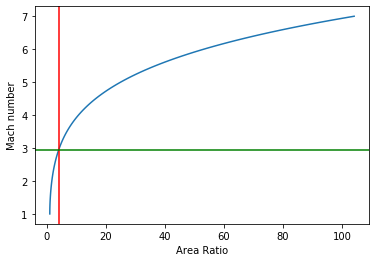

In [68]:
plt.plot(area_ratio, M5)
plt.axvline(x=4.0, color='r')
plt.axhline(y=2.94, color = 'g')
plt.xlabel('Area Ratio')
plt.ylabel('Mach number')

In [72]:
tot_t = 300 # FIND ACTUAL VALUE
tot_p = 100 # FIND ACTUAL VALUE
R = 287
p_0 = 1 # p_0 is the ambient pressure = 1atm
m_dot = ((A4*tot_p)/np.sqrt(tot_t))*(np.sqrt(gamma/R))*(((gamma+1)/2)**(-(gamma+1)/(2*(gamma-1))))
exit_t = tot_t/(1+((gamma-1)/2*(M5**2)))
exit_p = tot_p/((1+(((gamma-1)/2)*(M5**2)))**(gamma/(gamma-1)))
exit_area = area_ratio*A4
exit_vel = M5*np.sqrt(gamma*R*exit_t)
thrust = m_dot*exit_vel + (exit_p-p_0)*exit_area

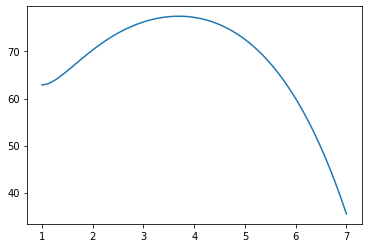

In [73]:
plt.plot(M5,thrust)

## SERN - Single Expansion Ramp Nozzle

In [ ]:
epsilon = np.linspace(0,1,10)
A4 = 0.5
A5 = 1.0
M4 = 1
gamma = 1.4

# maximum allowable area without SERN was 1 meter sq. 
A5_new = A5 + epsilon*A5
M5 = np.linspace(1,3,100)
A5